# Income Prediction

This is a 2-class classification problem (income **high** or **low**). There are 32561 instances and 14 features. Target value is the last (income) column, 0 for low income, 1 for high income. There are no missing values, but some values are categorical (like education and marital status). They need to be converted to numerical values (integers) to be processed by most machine learning algorithms.


 You can download the dataset as follows:

In [1]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
url =  "./DATA602repo/income2.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
import pandas as pd
data = pd.read_csv(url, header=None, names=names)


fatal: destination path 'DATA602repo' already exists and is not an empty directory.



You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc.

In [2]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Separate features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Using One Hot coding to convert categorical variables to numerical

In [5]:
# Convert categorical variables to numerical using label encoding
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create a pipeline for Random Forest
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# Set parameters for grid search for Random Forest
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15]
}

# Apply GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10, 15],
                         'rf__n_estimators': [100, 200, 300]})

In [8]:
from sklearn.metrics import accuracy_score, classification_report
# Print the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'rf__max_depth': 15, 'rf__n_estimators': 200}
Best Cross-Validation Score: 0.8642125599094141

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4942
           1       0.79      0.61      0.69      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



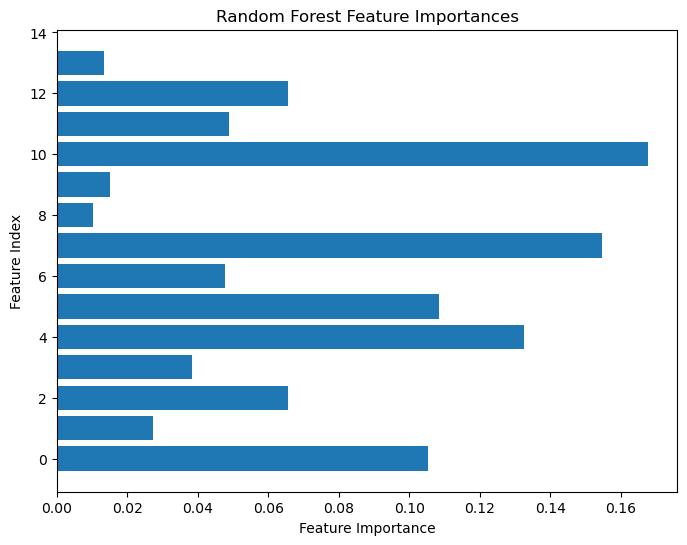

In [9]:
# Plot feature importances
feature_importances = grid_search_rf.best_estimator_['rf'].feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest Feature Importances')
plt.show()


# SVM

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# Create a pipeline for SVM
pipeline_svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

# Set parameters for grid search for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10]
}

# Apply GridSearchCV for SVM
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]})

In [11]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Score:", grid_search_svm.best_score_)

# Evaluate the best model on the test set
best_model = grid_search_svm.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'svm__C': 1, 'svm__gamma': 0.1}
Best Cross-Validation Score: 0.8484723656715512

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.77      0.55      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


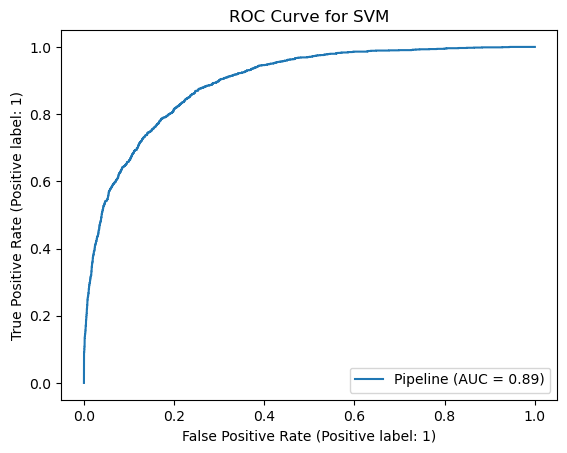

In [12]:

# Plot ROC curve
plot_roc_curve(grid_search_svm.best_estimator_, X_test, y_test)
plt.title('ROC Curve for SVM')
plt.show()


# Logistic Regression

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns


# Create a pipeline for Logistic Regression
pipeline_logreg = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(solver='liblinear'))])

# Set parameters for grid search for Logistic Regression
param_grid_logreg = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logreg__penalty': ['l1', 'l2']
}

# Apply GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2']})

In [14]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_logreg.best_params_)
print("Best Cross-Validation Score:", grid_search_logreg.best_score_)

# Evaluate the best model on the test set
best_model = grid_search_logreg.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Best Cross-Validation Score: 0.8246698004229355

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



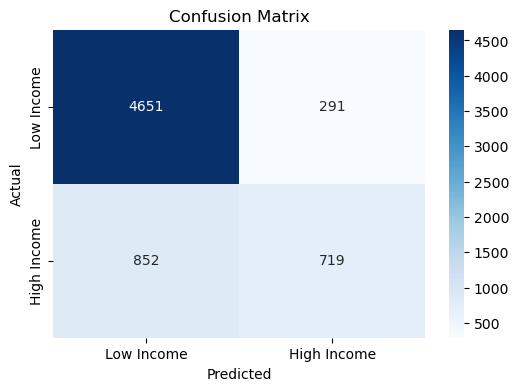

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Income', 'High Income'], yticklabels=['Low Income', 'High Income'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create a pipeline for Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])



In [17]:
# Define the hyperparameter grid for grid search
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [18]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
Best Cross-Validation Score: 0.834728200011128

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.60      0.65      1571

    accuracy                           0.84      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


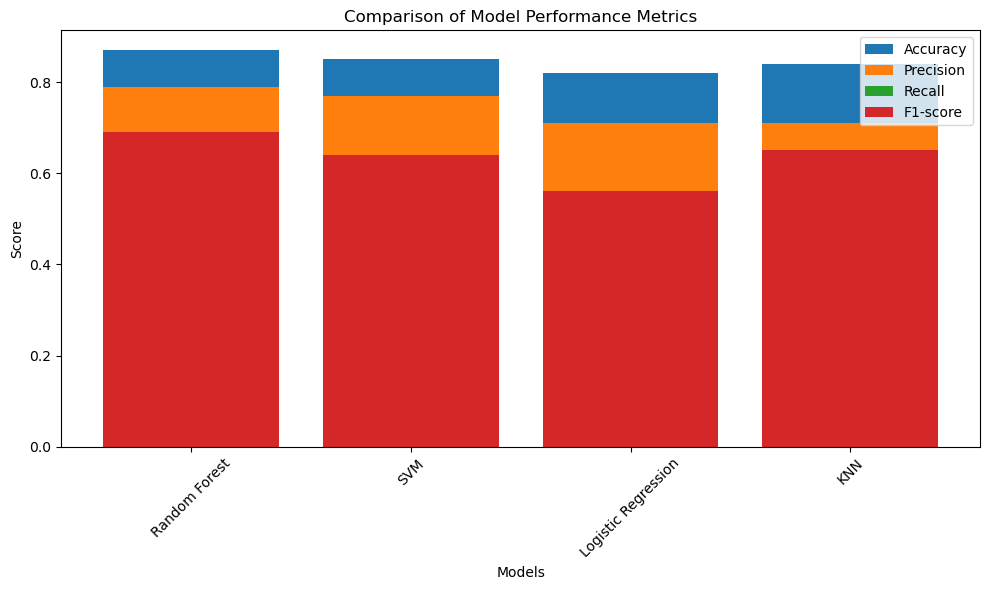

In [19]:
import matplotlib.pyplot as plt

# Evaluation metrics for each model
accuracies = [0.87, 0.85, 0.82, 0.84]
precisions = [0.79, 0.77, 0.71, 0.71]
recalls = [0.62, 0.55, 0.46, 0.60]
f1_scores = [0.69, 0.64, 0.56, 0.65]
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN']

# Create a bar chart for each metric
plt.figure(figsize=(10, 6))

plt.bar(models, accuracies, label='Accuracy')
plt.bar(models, precisions, label='Precision')
plt.bar(models, recalls, label='Recall')
plt.bar(models, f1_scores, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


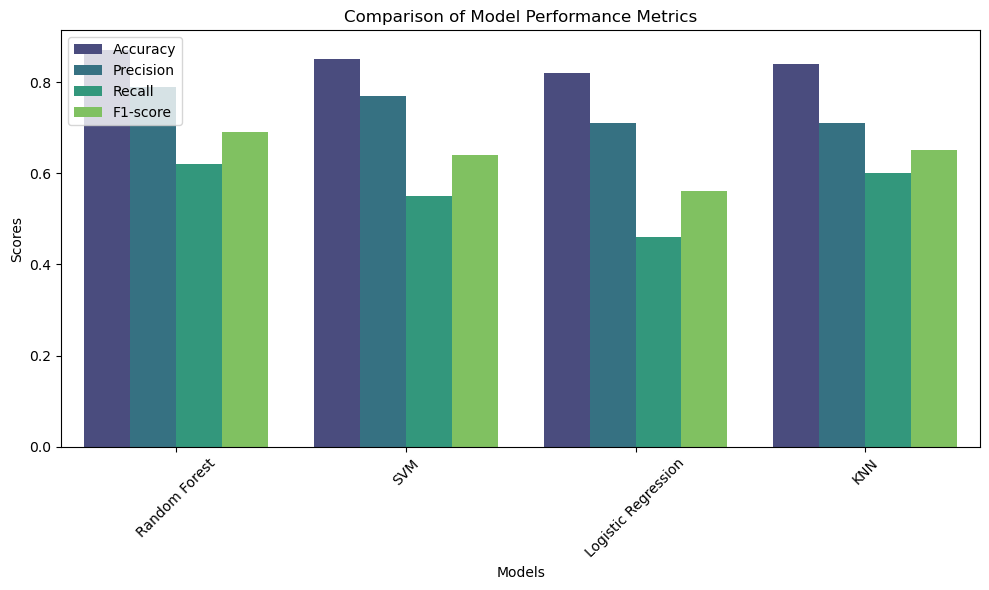

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Evaluation metrics for each model
accuracies = [0.87, 0.85, 0.82, 0.84]
precisions = [0.79, 0.77, 0.71, 0.71]
recalls = [0.62, 0.55, 0.46, 0.60]
f1_scores = [0.69, 0.64, 0.56, 0.65]
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN']

# Create a DataFrame with the data
data = pd.DataFrame({
    'Models': models * 4,
    'Metrics': ['Accuracy'] * 4 + ['Precision'] * 4 + ['Recall'] * 4 + ['F1-score'] * 4,
    'Scores': accuracies + precisions + recalls + f1_scores
})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='Scores', hue='Metrics', data=data, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Performing Ensembling techniques to further improve the predictions

# Stacking

In [22]:
from sklearn.ensemble import StackingClassifier

# Define the estimators for stacking
estimators = [
    ('rf', grid_search_rf.best_estimator_),  # Random Forest
    ('svm', grid_search_svm.best_estimator_),  # SVM
    ('logreg', grid_search_logreg.best_estimator_),  # Logistic Regression
    ('knn', grid_search.best_estimator_)  # KNN
]

# Create a Stacking Classifier with the best estimators
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_stacking = stacking_clf.predict(X_test)
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stacking))



Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4942
           1       0.78      0.63      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



# Voting Classifier

In [23]:
from sklearn.ensemble import VotingClassifier

# Define the estimators for the voting classifier including all models
estimators_all = [
    ('rf', grid_search_rf.best_estimator_),  # Random Forest
    ('svm', grid_search_svm.best_estimator_),  # SVM
    ('logreg', grid_search_logreg.best_estimator_),  # Logistic Regression
    ('knn', grid_search.best_estimator_)  # KNN
]

# Create a voting classifier with all models
voting_clf_all = VotingClassifier(estimators=estimators_all, voting='hard')  # or 'soft' for soft voting

# Train the voting classifier
voting_clf_all.fit(X_train, y_train)

# Evaluate on the test set
y_pred_voting_all = voting_clf_all.predict(X_test)
print("\nExtended Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting_all))



Extended Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4942
           1       0.81      0.53      0.64      1571

    accuracy                           0.86      6513
   macro avg       0.84      0.74      0.77      6513
weighted avg       0.85      0.86      0.84      6513



/Users/karthikvibuthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Bagging with Random Forest:
Since random forest performed best over all we are performing bagging with RF

In [24]:
from sklearn.ensemble import BaggingClassifier

# Create a Bagging Classifier with Random Forest as the base estimator
bagging_rf = BaggingClassifier(base_estimator=grid_search_rf.best_estimator_, n_estimators=10, random_state=0)

# Train the Bagging Classifier
bagging_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_bagging_rf = bagging_rf.predict(X_test)
print("\nBagging with Random Forest Classification Report:")
print(classification_report(y_test, y_pred_bagging_rf))



Bagging with Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.79      0.62      0.69      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



# Boosting with Gradient Boosting:

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier using the best parameters found earlier
boosting_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the Gradient Boosting Classifier
boosting_gb.fit(X_train, y_train)

# Evaluate on the test set
y_pred_boosting_gb = boosting_gb.predict(X_test)
print("\nBoosting with Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_boosting_gb))



Boosting with Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.87      0.87      0.86      6513



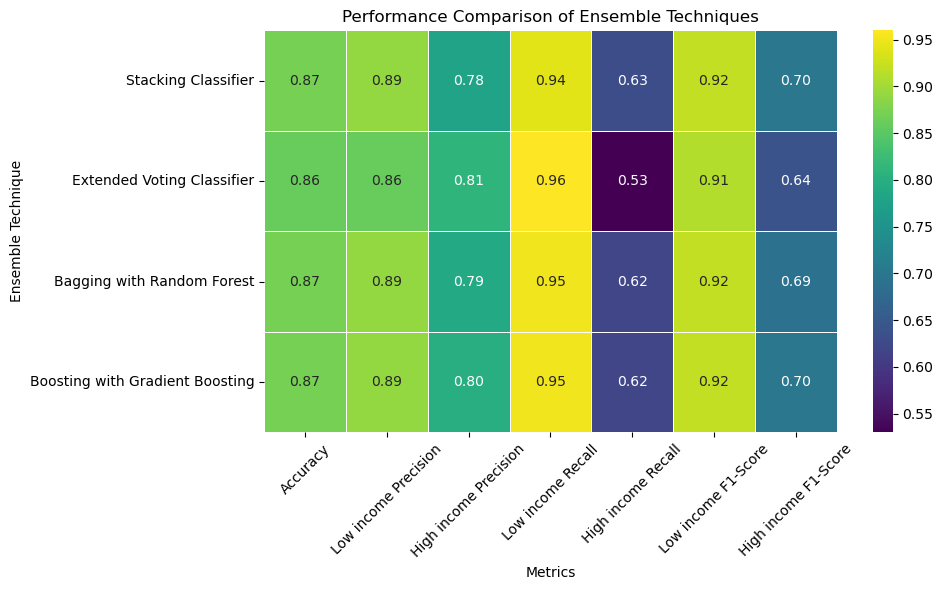

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Scores for each ensemble technique
data = {
    'Ensemble Technique': ['Stacking Classifier', 'Extended Voting Classifier', 'Bagging with Random Forest', 'Boosting with Gradient Boosting'],
    'Accuracy': [0.87, 0.86, 0.87, 0.87],
    'Low income Precision': [0.89, 0.86, 0.89, 0.89],
    'High income Precision': [0.78, 0.81, 0.79, 0.80],
    'Low income Recall': [0.94, 0.96, 0.95, 0.95],
    'High income Recall': [0.63, 0.53, 0.62, 0.62],
    'Low income F1-Score': [0.92, 0.91, 0.92, 0.92],
    'High income F1-Score': [0.70, 0.64, 0.69, 0.70]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Ensemble Technique column as the index for heatmap
df.set_index('Ensemble Technique', inplace=True)


# Plotting a heatmap using Seaborn with highlighted maximum values
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='viridis', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)
plt.title('Performance Comparison of Ensemble Techniques')
plt.xlabel('Metrics')
plt.ylabel('Ensemble Technique')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


We can using ensembling techniques accuracies are improved overall but equal to Random forst scores. Stacking, Bagging and Boosting for random forest have best accuracy of 87 %